<a href="https://colab.research.google.com/github/gabgmont/QuarentenaDados/blob/master/Aula%2001/Aula_01_anota%C3%A7%C3%B5es_desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Aula 01**

#Importando a biblioteca pandas para fazer a leitura dos dados.

In [0]:
import pandas as pd

#Lendo o arquivo .csv referente aos filmes listados no dataset e printando os 5 primeiros registros.


In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/gabgmont/QuarentenaDados/master/Aula%2001/ml-latest-small/movies.csv?token=AN2IIPEO57I6WJIXZC7AF7K6TYLOM")

In [5]:
filmes.head(15) #.head traz como padrão os 5 primeiros itens, mas pode ser especificado uma quantidade de elementos a serem exibidos.

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [0]:
filmes.columns = ["id_filme", "titulo", "generos"]

#Lendo o arquivo .csv referente às avaliações dos usuários, e printando os 5 primeiros registros.


In [0]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/gabgmont/QuarentenaDados/master/Aula%2001/ml-latest-small/ratings.csv?token=AN2IIPEKLK2EILRZNSRQ5FS6TYLKW")

In [8]:
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#Retornando o formato da tabela (100836 linhas, e 4 colunas).

In [9]:
avaliacoes.shape

(100836, 4)

#Alterando o nome das colunas.

In [10]:
avaliacoes.columns = ["id_usuario", "id_filme", "nota", "momento_avaliacao"]
avaliacoes.head()

,id_usuario,id_filme,nota,momento_avaliacao
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#Buscando as avaliações referentes a um filme específico usando ".query()".

In [11]:
avaliacoes_filme2 = avaliacoes.query("id_filme == g2") #buscando todos os dados em que o id do filme é igual a 2.
avaliacoes_filme2.head()

,id_usuario,id_filme,nota,momento_avaliacao
560,6,2,4.0,845553522
1026,8,2,4.0,839463806
1773,18,2,3.0,1455617462
2275,19,2,3.0,965704331
2977,20,2,3.0,1054038313


Tendo as avaliações de um determinado cojunto, podemos "descrever" essas informações, trazendo algumas informações referentes a esses dados usando ".describe()":

In [12]:
avaliacoes_filme2.describe()
#soma
#media
#std
#minimo
#25%
#mediana
#75%
#max

,id_usuario,id_filme,nota,momento_avaliacao
count,110.000000,110.0,110.000000,1.100000e+02
mean,329.554545,2.0,3.431818,1.135805e+09
std,180.668513,0.0,0.881713,2.362198e+08
min,6.000000,2.0,0.500000,8.293223e+08
25%,171.000000,2.0,3.000000,8.939017e+08
50%,322.500000,2.0,3.500000,1.113762e+09
75%,481.500000,2.0,4.000000,1.347033e+09
max,608.000000,2.0,5.000000,1.529902e+09


Também é possível buscar somente uma estatística específica que estamos buscando, como por exemplo a média.

In [13]:
avaliacoes_filme2.mean()
#avaliacoes_filme2.std()

id_usuario           3.295545e+02
id_filme             2.000000e+00
nota                 3.431818e+00
momento_avaliacao    1.135805e+09
dtype: float64

#Calculando apenas a média da nota de cada filme
Buscando apenas a coluna de notas da tabela de avaliações (mantendo o index de cada nota):

In [14]:
avaliacoes["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

Agora extraindo a média entre todas as notas:

In [15]:
avaliacoes["nota"].mean()

3.501556983616962

Esta é a média entre todos os filmes. Para buscar a média por filme é preciso agrupa-los usando algum dos indicadores, no caso "id_filme", usando o método "groupby()", e passando como parâmetro o índice que será usado para agrupar os elementos.

In [16]:
media_por_filme = avaliacoes.groupby("id_filme")["nota"].mean()
media_por_filme.head()

id_filme
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

#Agora será necessário unir o nome dos filmes com a média de cada um.
Para fazer isso é preciso unir os dois dataframes, o de filmes, e o de medias por filme, o que pode ser feito criando um novo dataframe, e usanod o comando ".join()" para unir os filmes com as médias.

In [17]:
filmes.head()

,id_filme,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
media_por_filme.head()

id_filme
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [19]:
filme_com_media = filmes.join(media_por_filme, on = "id_filme")
filme_com_media.head()

,id_filme,titulo,genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Após juntar as tabelas, é possível ordena-las usando qualquer um dos índices pelo método "sort_values". No momento ela está ordenada pelo ID do filme, mas podemos ordena-la pela média para vermos quais os filmes com a maior média.

In [20]:
filme_com_media.sort_values("nota", ascending = False).head(10)

,id_filme,titulo,genero,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


#Podemos também gerar gráficos com essas informações para visualizar de uma maneira geral a distribuição das notas por exemplo.
O prórpio pandas possui uma maneira de exibir um gráfico pelo método ".plot()", assim não é necessário importar nenhuma biblioteca para visualizar o grafico, apenas para edita-lo e deixa-lo mais bonito.

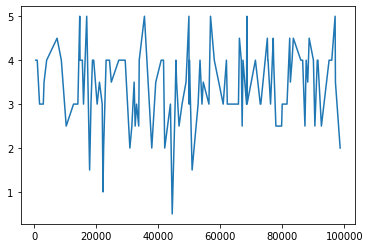

In [21]:
avaliacoes.query("id_filme == 2")["nota"].plot() #separando todas as notas em que o id do fimle é 2 e plotando no gráfico.

Como o gráfico de linhas não é o ideal para esse tipo de dado, seria mais interessante saber quantas notas X temos, e não como as notas variam em função do id do usuário. 
Portanto podemos alterar o estilo do gráfico adicionando o parâmetro "kind" no método ".plot()".


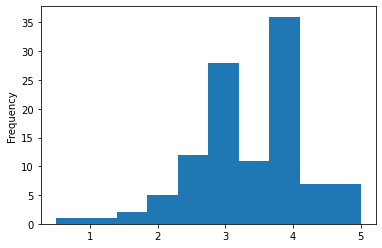

In [22]:
avaliacoes.query("id_filme == 2")["nota"].plot(kind = 'hist') # mudando o gráfico de linhas padrão para um histográfico.

Também é possível adicionar um título ao gráfico colocando o parâmetro "title" no método ".plot()".

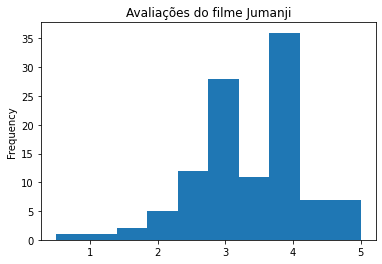

In [23]:
jumanji_graf = avaliacoes.query("id_filme == 2")["nota"].plot(kind = 'hist', title = 'Avaliações do filme Jumanji')

#Para podermos manipular melhor os gráficos, existe uma biblioteca chamada matplotlib.
Ela permite fazer alterações mais complexas do que apenas a biblioteca pandas permite.

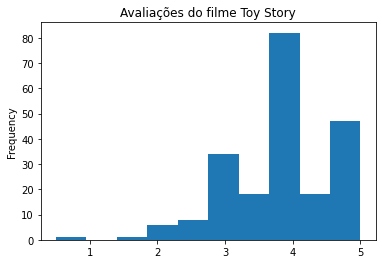

In [24]:
import matplotlib.pyplot as plt

avaliacoes.query("id_filme == 1")["nota"].plot(kind = 'hist')
plt.title("Avaliações do filme Toy Story")
plt.show()

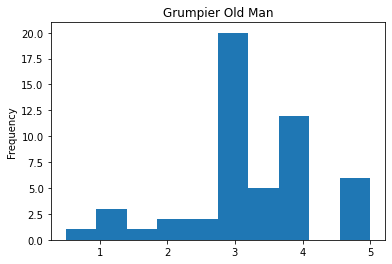

In [25]:
avaliacoes.query("id_filme == 3")["nota"].plot(kind = 'hist', title = "Grumpier Old Man")

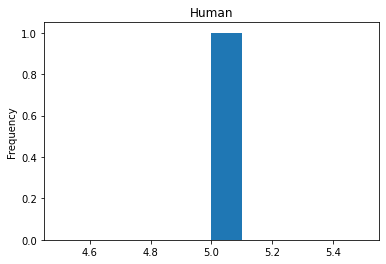

In [26]:
avaliacoes.query("id_filme == 143511")["nota"].plot(kind = 'hist', title = "Human")

##Desafios da Aula 01
Desafio 1: Determine quantos filmes não tem avaliações e quais são esses filmes.

In [52]:
filme_com_media["nota"].isnull().value_counts()

False    9724
True       18
Name: nota, dtype: int64

In [53]:
filme_sem_media = filme_com_media['nota'].isnull()
filme_com_media[filme_sem_media]

,id_filme,titulo,genero,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


Desafio 2: Mudar o nome da coluna "nota" para "Média" no Dataframe de filme com média.

In [65]:
filme_com_media.columns = ["id_filme", "titulo", "genero", "nota_media"]
filme_com_media

,id_filme,titulo,genero,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


Desafio 3: Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [80]:
num_av_filme = avaliacoes.groupby("id_filme")["nota"].count()
num_av_filme

id_filme
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: nota, Length: 9724, dtype: int64

In [91]:
filme_com_qtd_avaliacao = filmes.join(num_av_filme, on='id_filme')
filme_com_qtd_avaliacao.columns = ["id_filme", "titulo", "genero", "qtd_notas"]
filme_com_qtd_avaliacao

,id_filme,titulo,genero,qtd_notas
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
4,5,Father of the Bride Part II (1995),Comedy,49.0
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1.0
9739,193585,Flint (2017),Drama,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1.0


Desafio 4: Arredondar as médias (coluna de nota média) para duas casas decimais.

In [104]:
filme_com_media.nota_media.round(2)
filme_com_media

,id_filme,titulo,genero,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50
9739,193585,Flint (2017),Drama,3.50
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50


Desafios 5 e 6: 

-Descobrir os generos dos filmes (quais são eles, únicos).

-Contar o número de aparições de cada genero.


In [109]:
#Maneira de fazer sem utilizar a biblioteca Pandas

generos_distintos = []

for generos in filmes['generos'].str.split('|'):
  for genero in generos:
    if genero not in generos_distintos:
      generos_distintos.append(genero)

generos_distintos

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'War',
 'Musical',
 'Documentary',
 'IMAX',
 'Western',
 'Film-Noir',
 '(no genres listed)']

In [163]:
#Obtendo de forma manual a quantidade de filmes em cada genero, através de um contador

qtd_generos = {genero : 0 for genero in generos_distintos}

for generos in filmes['generos'].str.split('|'):
  for genero in generos:
    qtd_generos[genero] = qtd_generos[genero] + 1

qtd_generos

{'(no genres listed)': 34,
 'Action': 1828,
 'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Crime': 1199,
 'Documentary': 440,
 'Drama': 4361,
 'Fantasy': 779,
 'Film-Noir': 87,
 'Horror': 978,
 'IMAX': 158,
 'Musical': 334,
 'Mystery': 573,
 'Romance': 1596,
 'Sci-Fi': 980,
 'Thriller': 1894,
 'War': 382,
 'Western': 167}

In [141]:
#Forma de retornar cada generos utilizando a função "get_dummies".
#Ela separa a string no parametro dado (no caso, "|"), e determina cada item diferente como uma coluna no Dataframe gerado 
filmes['generos'].str.get_dummies('|')

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [123]:
# Então é possível somar quantas vezes a função obteve o retorno "True", para cada genero destacado no metodo "get_dummies"

qtd_generos2 = filmes['generos'].str.get_dummies('|').sum()
qtd_generos2

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

Desafio 7: Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.


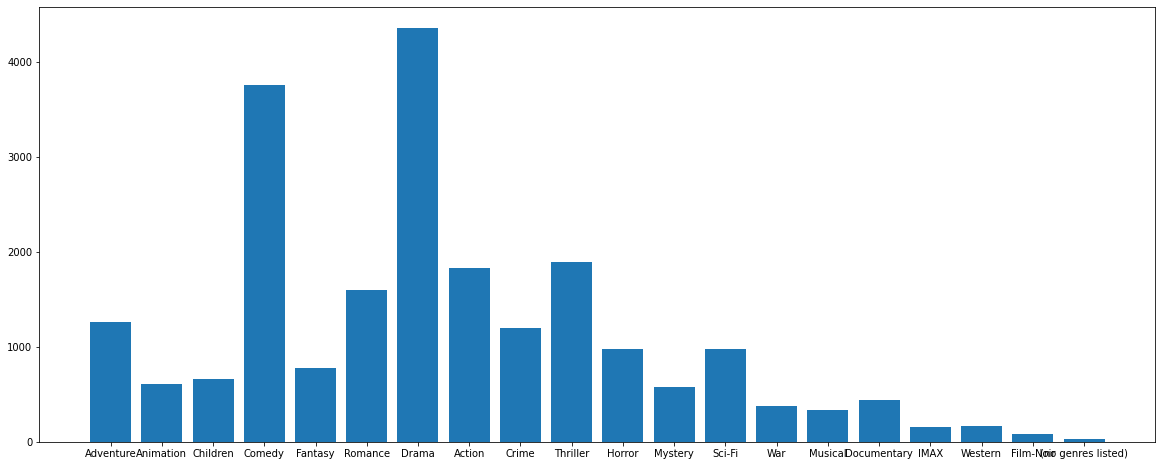

In [180]:
#Para o primeiro método:
    #from operator import itemgetter
    #for3 item in sorted(qtd_generos, key = qtd_generos.get):
    #    print (qtd_generos[item])

plt.figure(figsize=(20,8))
plt.bar(qtd_generos.keys(), qtd_generos.values())
plt.show()

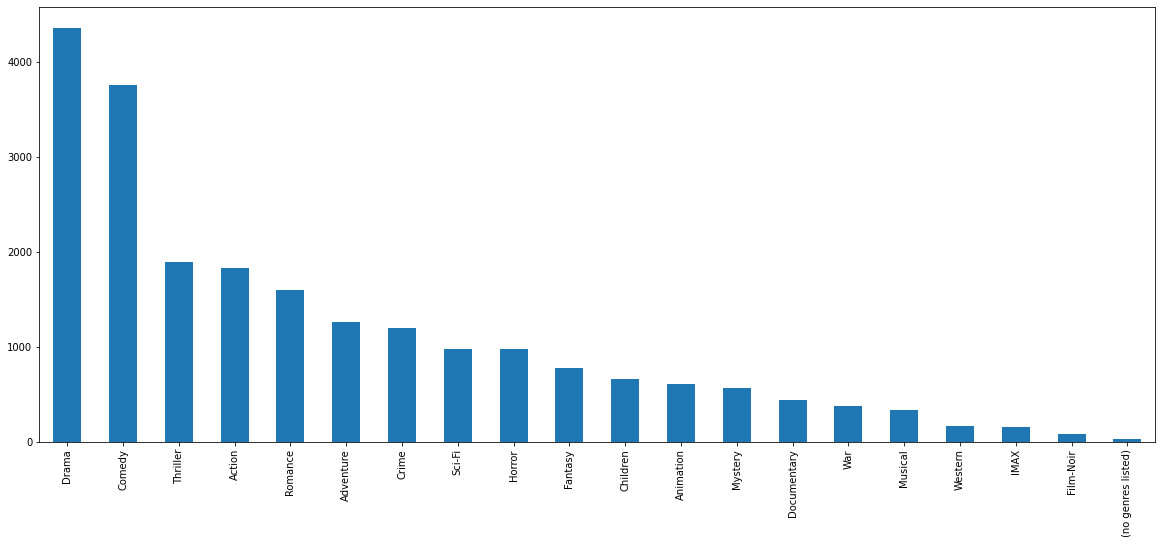

In [189]:
#Para o método 2

qtd_generos2 = filmes['generos'].str.get_dummies('|').sum()
qtd_generos2.sort_values(ascending=False).plot(kind='bar', figsize = (20,8))